## Unsupervised Learning to Predict Race from Merged Dataset

In [1]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Inspect

In [2]:
full_data_df = pd.read_csv('final_merged.csv')
full_data_df

print("Shape of the data: ", full_data_df.shape)

full_data_df.info()
full_data_df.head()

Shape of the data:  (9222, 140)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9222 entries, 0 to 9221
Columns: 140 entries, Patient ID to Survival Months
dtypes: float64(77), int64(2), object(61)
memory usage: 9.9+ MB


/tmp/ipykernel_29693/3584519652.py:1: DtypeWarning: Columns (0,3,4,5,6,7,9,12,15,16,17,18,22,24,26,28,29,30,40,65,66,67,68,69,70,71,72,73,74,75,76,82,83,89,90,91,92,93,96,97,98,99,100,101,102,103,104,105,106,107,108,109,115) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data_df = pd.read_csv('final_merged.csv')


,Patient ID,Age,Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Unnamed: 3,T Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,Breast_MRI_001,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Poorly differentiated; Grade III,Regional,Positive,Negative,6.0,1.0,66.0
1,Breast_MRI_001,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Moderately differentiated; Grade II,Regional,Positive,Positive,9.0,1.0,72.0
2,Breast_MRI_002,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast_MRI_003,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Poorly differentiated; Grade III,Regional,Positive,Positive,6.0,1.0,52.0
4,Breast_MRI_003,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T2,IIB,Moderately differentiated; Grade II,Regional,Positive,Positive,19.0,1.0,55.0


## Data Cleaning

In [13]:
#Dropping any duplicate rows
full_data_df.drop_duplicates(inplace=True)

# Drop features with a lot of missing values
missing__ratio = full_data_df.isnull().mean()
columns_to_drop = missing__ratio[missing__ratio > 0.8].index
full_data_df.drop(columns=columns_to_drop, inplace=True)


In [15]:
# Look at new shape of the data
print("Shape of the data after dropping columns with a lot of missing values: ", full_data_df.shape)

Shape of the data after dropping columns with a lot of missing values:  (6693, 111)


In [16]:
#inspecting the race column
full_data_df['Race'].value_counts(dropna=False)

#Drop rows with missing values in Race column

full_data_df = full_data_df.dropna(subset=['Race'])

#Drop rows where race is = 0
full_data_df = full_data_df[full_data_df['Race'] != 0]

full_data_df['Race'].value_counts()

Race
1.0    5856
2.0     470
4.0     321
5.0      18
3.0      14
6.0       9
8.0       4
7.0       1
Name: count, dtype: int64

## EDA

In [17]:
full_data_df.describe()

,Age,ER,HER2,Histologic type,PR,Tumor Size,T Stage,Days to MRI (From the Date of Diagnosis),Manufacturer,Manufacturer Model Name,...,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure),Race,N Stage,Regional Node Examined,Reginol Node Positive,Survival Months
count,6693.000000,4944.000000,4944.000000,6693.000000,4944.000000,6056.000000,6687.000000,4944.000000,4944.000000,4944.000000,...,1722.000000,1673.000000,1929.000000,1929.000000,1929.00000,6693.000000,6671.000000,6056.000000,6056.000000,6056.000000
mean,53.247124,0.803600,0.189523,0.596145,0.702063,28.519815,1.708689,12.528519,0.582120,2.893811,...,0.660859,-0.982666,0.444272,0.670295,2.39606,1.240849,1.204317,13.934610,3.410337,72.084544
std,8.718803,0.397314,0.391963,0.623003,0.457398,19.264544,0.714212,17.320590,0.908594,1.904946,...,0.837785,0.180538,0.770387,0.890914,4.75256,0.750747,0.685523,8.070807,4.475298,22.470205
min,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-123.000000,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,47.000000,1.000000,0.000000,0.000000,0.000000,16.000000,1.000000,7.000000,0.000000,1.000000,...,0.000000,-1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,8.000000,1.000000,57.000000
50%,53.000000,1.000000,0.000000,1.000000,1.000000,23.000000,2.000000,12.000000,0.000000,3.000000,...,1.000000,-1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,13.000000,2.000000,74.000000
75%,60.000000,1.000000,0.000000,1.000000,1.000000,35.000000,2.000000,19.250000,2.000000,4.000000,...,1.000000,-1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,18.000000,3.000000,90.000000
max,89.000000,1.000000,1.000000,9.000000,1.000000,140.000000,4.000000,381.000000,2.000000,7.000000,...,3.000000,1.000000,3.000000,3.000000,19.00000,8.000000,3.000000,61.000000,46.000000,107.000000


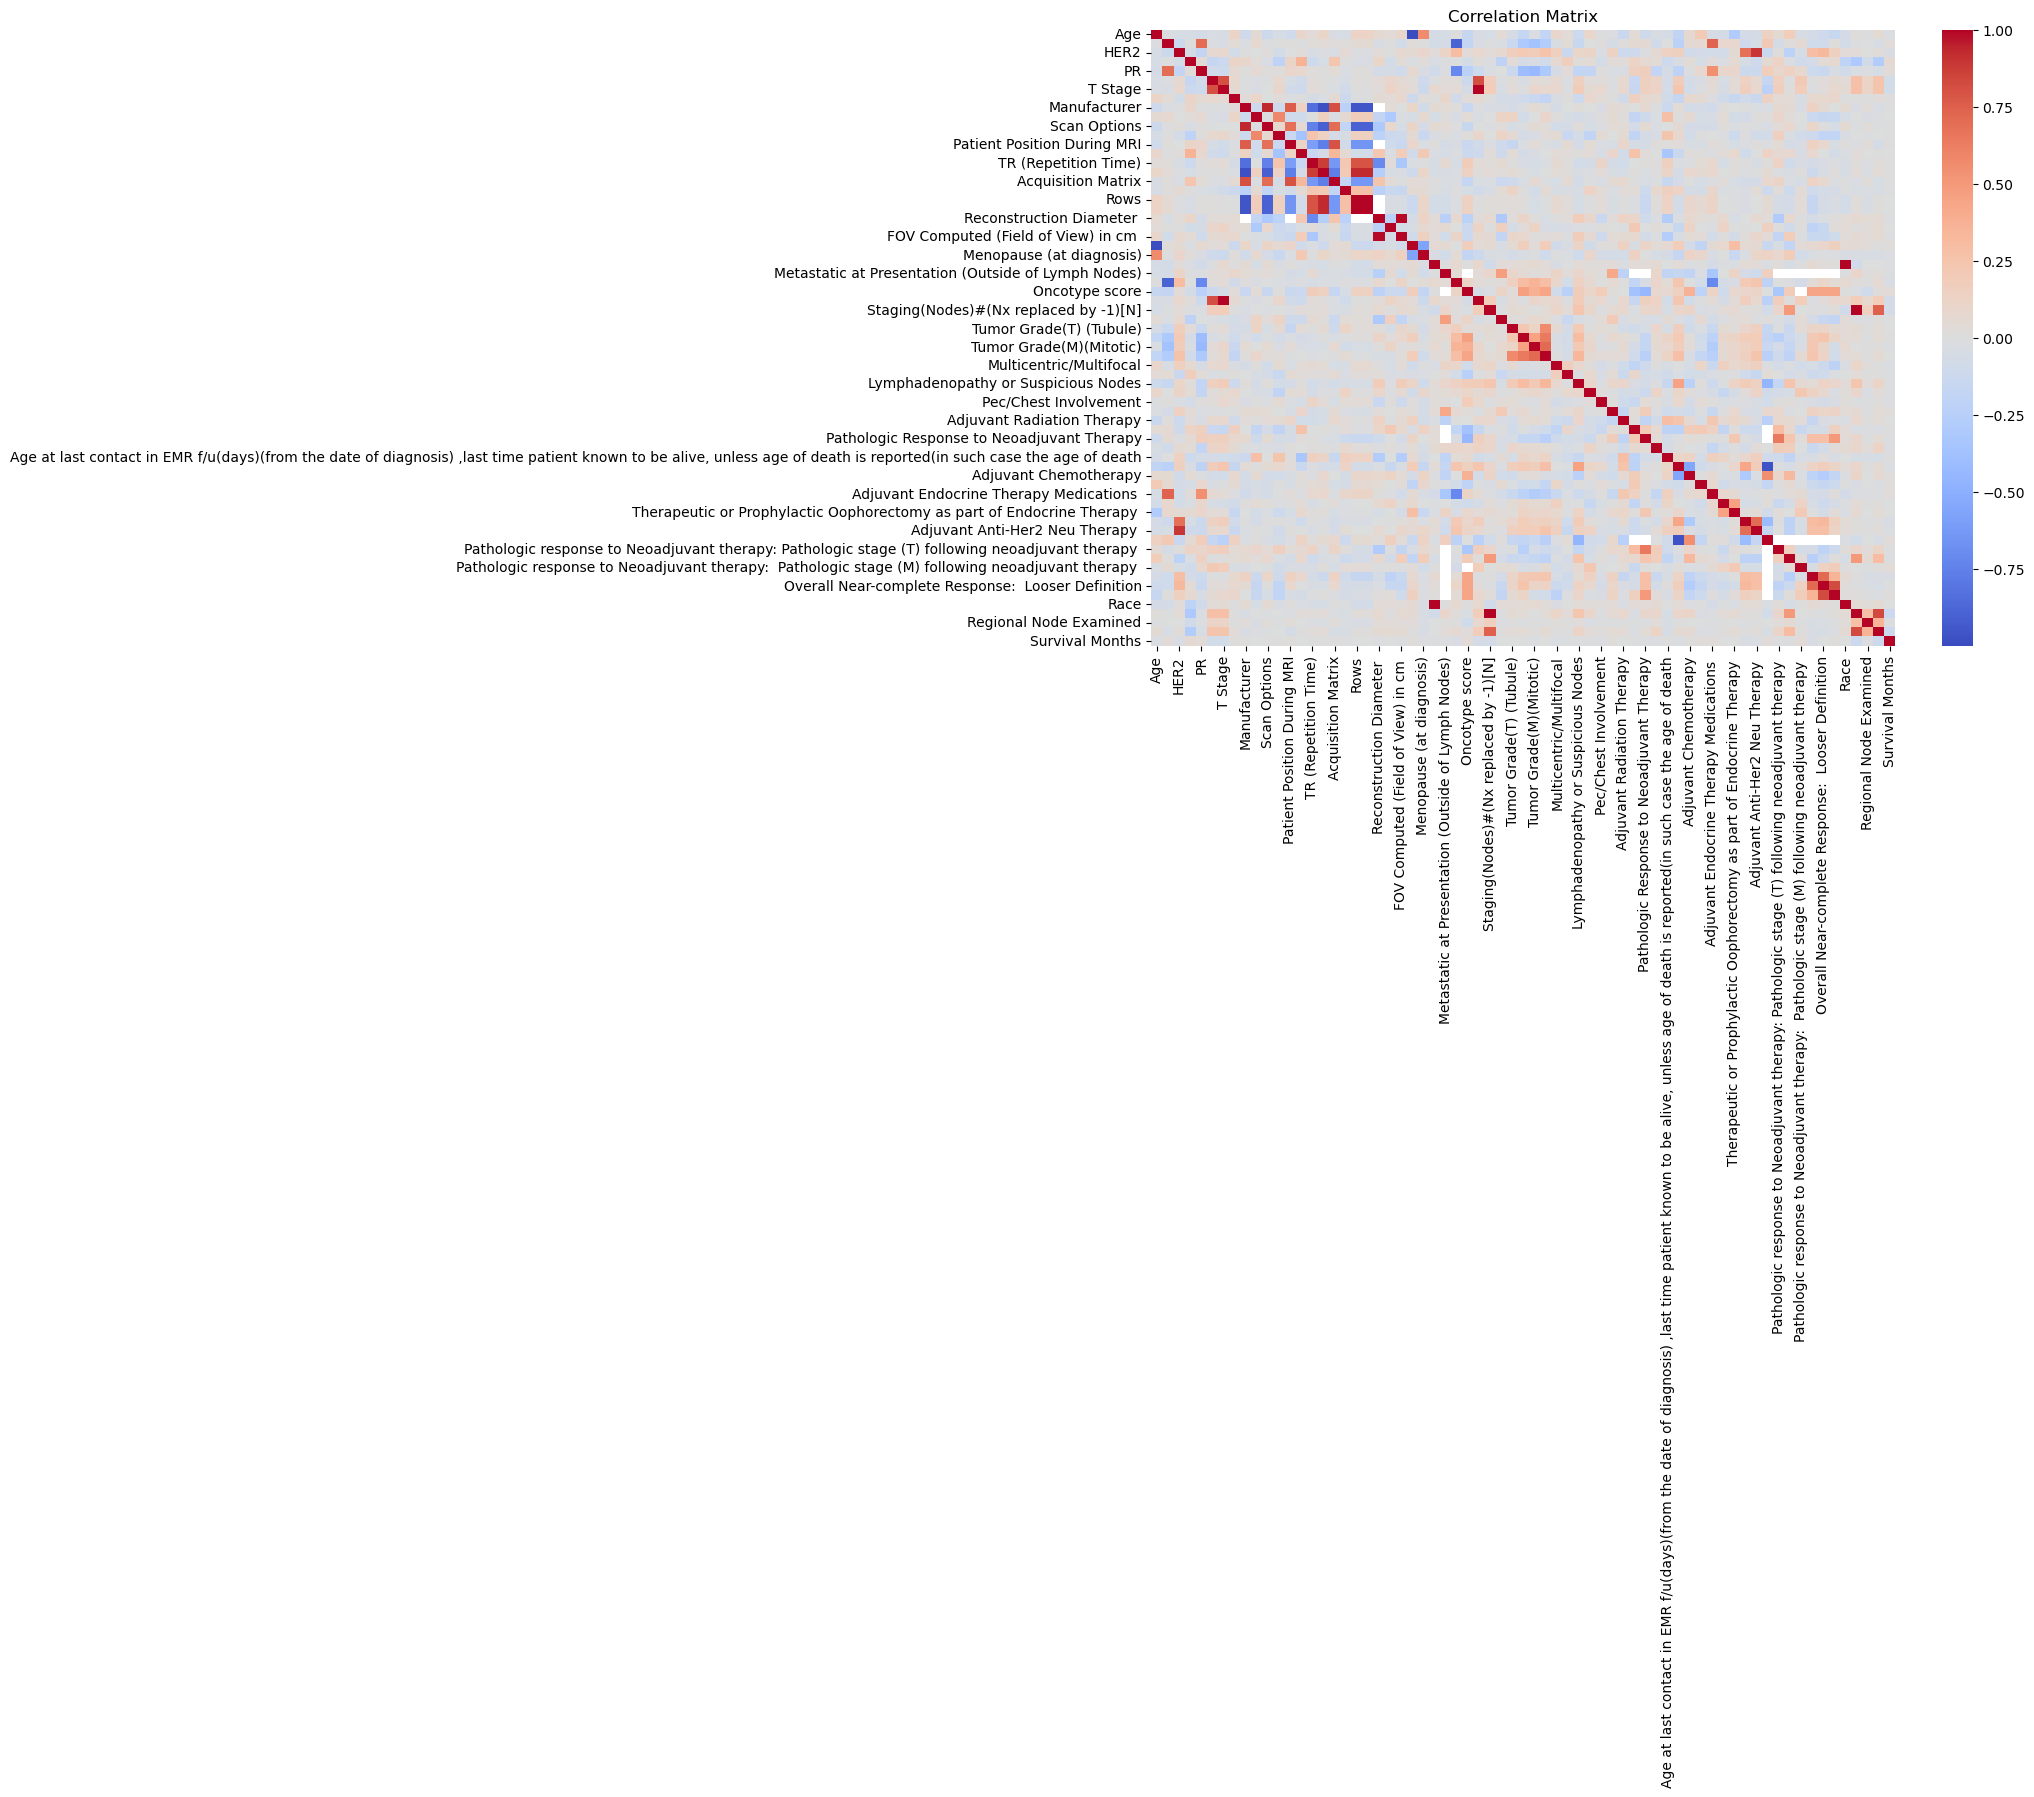

In [18]:
#Coorelation heatmap for numerical features

numeric_features = full_data_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [19]:
# Remove columns with more than 30% missing values (less strict than earlier)
missing_ratio = full_data_df.isnull().mean()
low_missing_cols = missing_ratio[missing_ratio < 0.3].index
df_filtered = full_data_df[low_missing_cols]


In [20]:
# remove low variance features
from sklearn.feature_selection import VarianceThreshold

numeric_data = df_filtered.select_dtypes(include=[np.number])
selector = VarianceThreshold(threshold=0.01)
reduced_data = selector.fit_transform(numeric_data)

selected_numeric_features = numeric_data.columns[selector.get_support()]

print("Selected numeric features after variance thresholding: ", selected_numeric_features)

Selected numeric features after variance thresholding:  Index(['Age', 'ER', 'HER2', 'Histologic type', 'PR', 'Tumor Size', 'T Stage',
       'Days to MRI (From the Date of Diagnosis)', 'Manufacturer',
       'Manufacturer Model Name', 'Scan Options', 'Field Strength (Tesla)',
       'Patient Position During MRI', 'Contrast Agent', 'TR (Repetition Time)',
       'TE (Echo Time)', 'Acquisition Matrix', 'Slice Thickness ', 'Rows',
       'Columns', 'Flip Angle ', 'FOV Computed (Field of View) in cm ',
       'Date of Birth (Days)', 'Menopause (at diagnosis)',
       'Race and Ethnicity',
       'Metastatic at Presentation (Outside of Lymph Nodes)', 'Mol Subtype',
       'Staging(Tumor Size)# [T]', 'Staging(Nodes)#(Nx replaced by -1)[N]',
       'Staging(Metastasis)#(Mx -replaced by -1)[M]',
       'Tumor Grade(T) (Tubule)', 'Tumor Grade(N)(Nuclear)',
       'Tumor Grade(M)(Mitotic)', 'Multicentric/Multifocal',
       'Contralateral Breast Involvement',
       'Lymphadenopathy or Suspiciou

In [21]:
#checking for multicollinearity
corr_matrix = numeric_data[selected_numeric_features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

final_features = [column for column in selected_numeric_features if column not in to_drop]
print("Final selected features after removing multicollinearity: ", final_features)

Final selected features after removing multicollinearity:  ['Age', 'ER', 'HER2', 'Histologic type', 'PR', 'Tumor Size', 'Days to MRI (From the Date of Diagnosis)', 'Manufacturer', 'Manufacturer Model Name', 'Field Strength (Tesla)', 'Patient Position During MRI', 'Contrast Agent', 'Slice Thickness ', 'Flip Angle ', 'FOV Computed (Field of View) in cm ', 'Menopause (at diagnosis)', 'Race and Ethnicity', 'Metastatic at Presentation (Outside of Lymph Nodes)', 'Staging(Nodes)#(Nx replaced by -1)[N]', 'Staging(Metastasis)#(Mx -replaced by -1)[M]', 'Tumor Grade(T) (Tubule)', 'Tumor Grade(N)(Nuclear)', 'Tumor Grade(M)(Mitotic)', 'Multicentric/Multifocal', 'Contralateral Breast Involvement', 'Lymphadenopathy or Suspicious Nodes', 'Skin/Nipple Invovlement', 'Neoadjuvant Radiation Therapy', 'Adjuvant Radiation Therapy', 'Recurrence event(s)', 'Neoadjuvant Chemotherapy', 'Adjuvant Chemotherapy', 'Neoadjuvant Endocrine Therapy Medications ', 'Adjuvant Endocrine Therapy Medications ', 'Known Ovaria

In [22]:
# Add cleaned categorical features(one hot encoded) to the final features

categoricals = df_filtered.select_dtypes(include=['object', 'category']).copy()

# Pick only categorical features with few unique values and low missingness
cat_candidates = [col for col in categoricals.columns if categoricals[col].nunique() <= 10 and categoricals[col].isnull().mean() < 0.3]
print("Candidate categorical features:", cat_candidates)

# One-hot encode
encoded_cats = pd.get_dummies(df_filtered[cat_candidates], drop_first=True)

encoded_cats

Candidate categorical features: ['Status', 'Bilateral breast cancer?{ 0=no 1=yes}', 'If Bilateral, Different Rec Status{0=no 1=yes}', 'Side Annotated{L=left R=right}', 'Side of cancer (for the other side){L=left, R=right}', 'Oncotype score (for the other side){##}', 'Nottingham grade (for the other side){#}', 'ER (for the other side){0 = neg, 1 = pos}', 'PR (for the other side){0 = neg, 1 = pos}', 'HER2 (for the other side){0 = neg, 1 = pos, 2=borderline}', 'Mol Subtype (for the other side){0 = luminal-like, 1 = ER/PR pos, HER2 pos, 2 = her2,3 = trip neg}', 'Definitive Surgery Type', 'Number of Ovaries In Situ ', 'Marital Status', 'T Stage ', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']


,Status_Dead,Bilateral breast cancer?{ 0=no 1=yes}_1,Bilateral breast cancer?{ 0=no 1=yes}_NC,"If Bilateral, Different Rec Status{0=no 1=yes}_1","If Bilateral, Different Rec Status{0=no 1=yes}_NC","If Bilateral, Different Rec Status{0=no 1=yes}_NP",Side Annotated{L=left R=right}_NC,Side Annotated{L=left R=right}_NP,Side Annotated{L=left R=right}_R,"Side of cancer (for the other side){L=left, R=right}_NC",...,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,True,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,True,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,True,False,False,True,...,True,False,False,False,True,False,False,True,True,True
4,False,False,True,False,True,False,True,False,False,True,...,True,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,True
9218,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,True
9219,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,True
9220,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True


In [ ]:
#final dataframe
final_df = pd.concat([numeric_data[final_features], encoded_cats], axis=1).dropna()
print("Final dataset shape for clustering:", final_df.shape)
final_df.head()



Final dataset shape for clustering: (4101, 90)


(4101, 90)

## PCA

In [26]:
from sklearn.preprocessing import StandardScaler

 #scale the data
scalar = StandardScaler()

X_scaled = scalar.fit_transform(final_df)



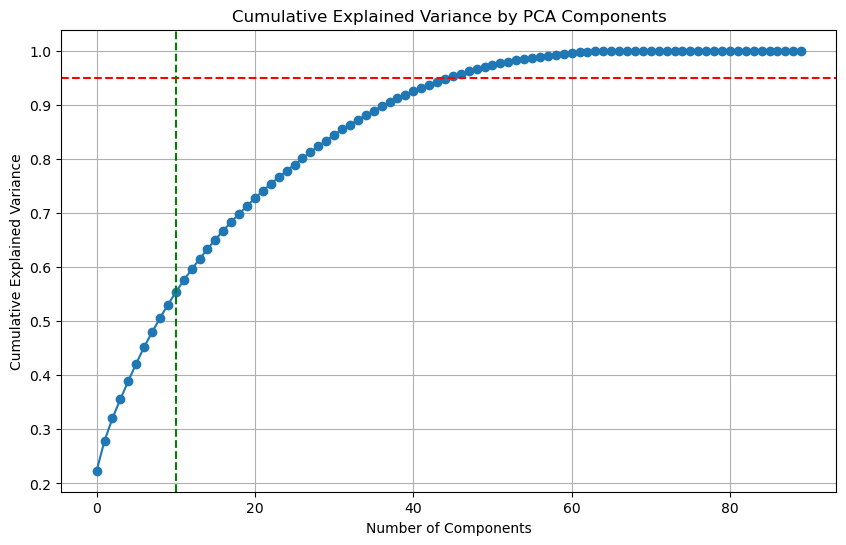

In [28]:
# fit PCA
from sklearn.decomposition import PCA

pca = PCA()  # Keep 95% of variance

pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=10, color='g', linestyle='--')
plt.grid()
plt.show()

Shape of the PCA transformed data:  (4101, 20)
Explained variance ratio for each component:  [0.22347193 0.05559966 0.04111353 0.03568462 0.03332186 0.03223404
 0.03077188 0.02745926 0.02580823 0.02486814 0.023007   0.02228067
 0.01999186 0.01930375 0.0185196  0.01745891 0.01652417 0.01604012
 0.01500231 0.01464835]


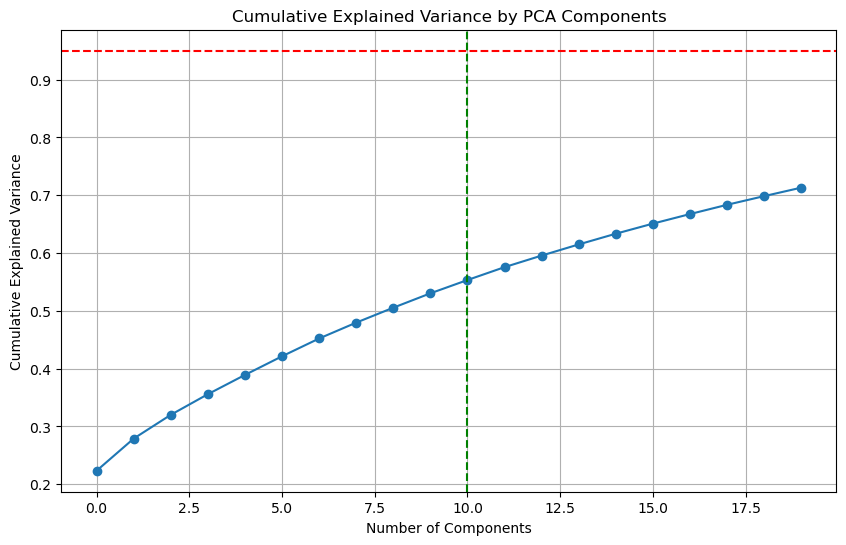

In [29]:
#choose 20 components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

# Check the shape of the PCA transformed data
print("Shape of the PCA transformed data: ", X_pca.shape)
# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each component: ", explained_variance)
# Check the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=10, color='g', linestyle='--')
plt.grid()
plt.show()


In [32]:
#COmponents we will be using
# Create a DataFrame of the 20 principal components
pca_columns = [f'PC{i+1}' for i in range(20)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Add the Race column back for evaluation
pca_df['Race'] = full_data_df.loc[final_df.index, 'Race'].values  # align by index

# View the final PCA dataframe
print("Final PCA DataFrame with Race column:")
print(pca_df.shape)


Final PCA DataFrame with Race column:
(4101, 21)


## KMEANS

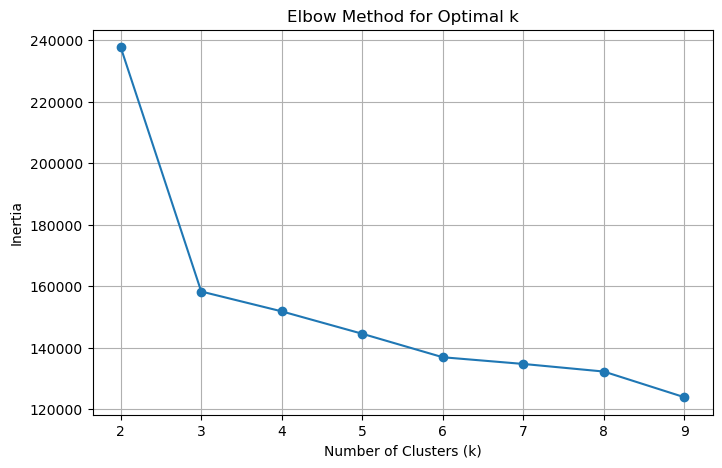

In [ ]:
from sklearn.cluster import KMeans

inertias = []
K_range = range(2, 10)  # Try 2 to 9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(pca_df.drop(columns=['Race']))
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Adjusted Rand Index (vs Race): 0.0078
Silhouette Score: 0.3732


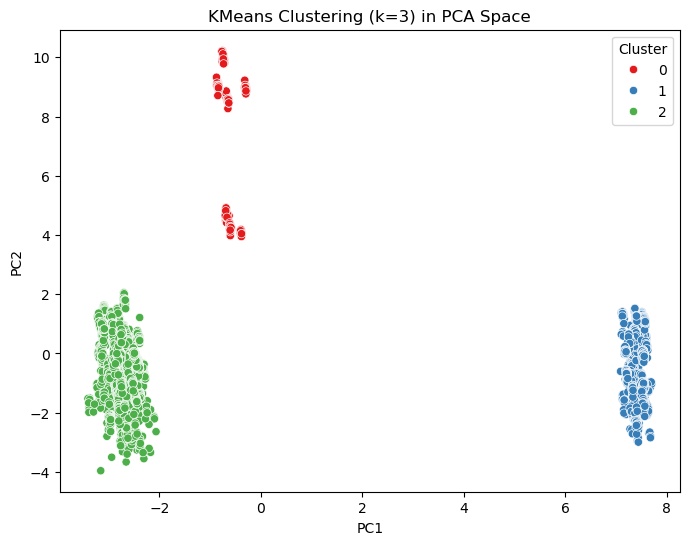

In [ ]:
from sklearn.metrics import adjusted_rand_score, silhouette_score


# Fit KMeans with k = 3 
# #This inflection point (the “elbow”) suggests k = 3 offers the best trade-off between
# Capturing distinct cluster structure
# Avoiding overfitting with too many clusters

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
pca_df['Cluster'] = kmeans.fit_predict(pca_df.drop(columns=['Race']))

# Evaluation
ari = adjusted_rand_score(pca_df['Race'], pca_df['Cluster'])
sil_score = silhouette_score(pca_df.drop(columns=['Race', 'Cluster']), pca_df['Cluster'])

print(f"Adjusted Rand Index (vs Race): {ari:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")

# Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('KMeans Clustering (k=3) in PCA Space')
plt.show()



In [41]:
# use gaussian mixture model

from sklearn.mixture import GaussianMixture


# Try 3 components (same as KMeans)
gmm = GaussianMixture(n_components=3, random_state=42)
pca_df['GMM_Cluster'] = gmm.fit_predict(pca_df.drop(columns=['Race', 'Cluster']))

# Evaluate
ari_gmm = adjusted_rand_score(pca_df['Race'], pca_df['GMM_Cluster'])
sil_gmm = silhouette_score(pca_df.drop(columns=['Race', 'Cluster', 'GMM_Cluster']), pca_df['GMM_Cluster'])

print(f"GMM Adjusted Rand Index (vs Race): {ari_gmm:.4f}")
print(f"GMM Silhouette Score: {sil_gmm:.4f}")

GMM Adjusted Rand Index (vs Race): 0.0078
GMM Silhouette Score: 0.3732


## Begin Prediction Model

In [42]:
from sklearn.model_selection import train_test_split

X = pca_df.drop(columns=['Race', 'Cluster'])  # use PC1–PC20
y = pca_df['Race']  # original race label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Weighted Logistic Regression:
               precision    recall  f1-score   support

         1.0       1.00      0.89      0.94       800
         2.0       0.17      0.85      0.28        20
         4.0       1.00      1.00      1.00         1

    accuracy                           0.89       821
   macro avg       0.72      0.91      0.74       821
weighted avg       0.98      0.89      0.93       821

Confusion Matrix:
 [[714  86   0]
 [  3  17   0]
 [  0   0   1]]


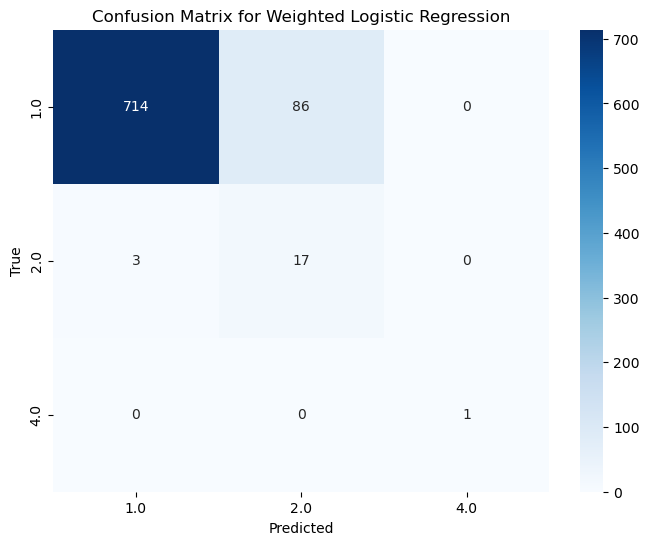

In [45]:
from sklearn.linear_model import LogisticRegression

clf_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')
clf_weighted.fit(X_train, y_train)
y_pred_weighted = clf_weighted.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Weighted Logistic Regression:\n", classification_report(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_weighted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Weighted Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





In [44]:
#trying random forest

from sklearn.ensemble import RandomForestClassifier
# Train
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
# Predict
y_pred_rf = rf_clf.predict(X_test)
# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       800
         2.0       1.00      0.25      0.40        20
         4.0       1.00      1.00      1.00         1

    accuracy                           0.98       821
   macro avg       0.99      0.75      0.80       821
weighted avg       0.98      0.98      0.98       821

Random Forest Confusion Matrix:
 [[800   0   0]
 [ 15   5   0]
 [  0   0   1]]
